# How to work with dates and times in pandas

In [1]:
import pandas as pd 

In [2]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [3]:
ufo.head() 

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [5]:
ufo.dtypes  # Note : the Time column is of type Time

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [7]:
# One very inefficient way is to use slice method on the Time series
# This method is very brittle and will break
ufo.Time.str.slice(-5,-3).astype(int) 

0        22
1        20
2        14
3        13
4        19
         ..
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int32

In [8]:
# A better method is to convert the Time to datatype datetime
ufo['Time'] = pd.to_datetime(ufo.Time)

In [9]:
ufo.dtypes 

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [10]:
ufo.head() 

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [11]:
ufo.Time.dt.hour 

0        22
1        20
2        14
3        13
4        19
         ..
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int64

In [13]:
ufo.Time.dt.weekday  

0        6
1        0
2        6
3        0
4        1
        ..
18236    6
18237    6
18238    6
18239    6
18240    6
Name: Time, Length: 18241, dtype: int64

In [14]:
ufo.Time.dt.weekday_name 

0         Sunday
1         Monday
2         Sunday
3         Monday
4        Tuesday
          ...   
18236     Sunday
18237     Sunday
18238     Sunday
18239     Sunday
18240     Sunday
Name: Time, Length: 18241, dtype: object

In [15]:
ufo.Time.dt.dayofyear 

0        152
1        181
2         46
3        152
4        108
        ... 
18236    366
18237    366
18238    366
18239    366
18240    366
Name: Time, Length: 18241, dtype: int64

In [16]:
# Some more example
pd.to_datetime('1/1/1900')  # Output is known as Timestamp

Timestamp('1900-01-01 00:00:00')

In [17]:
ts = pd.to_datetime('1/1/1900')

In [19]:
ufo.loc[ufo.Time >= ts, :].head() 

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [22]:
ufo.Time.max() 

Timestamp('2000-12-31 23:59:00')

In [23]:
ufo.Time.min() 

Timestamp('1930-06-01 22:00:00')

In [25]:
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [24]:
(ufo.Time.max() - ufo.Time.min()).days 

25781

# Bonus 

In [26]:
%matplotlib inline 

In [27]:
ufo['Year'] =  ufo.Time.dt.year 

In [28]:
ufo.head() 

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [29]:
ufo.Year.value_counts() 

1999    2774
2000    2635
1998    1743
1995    1344
1997    1237
        ... 
1941       2
1936       2
1935       1
1934       1
1933       1
Name: Year, Length: 68, dtype: int64

In [30]:
ufo.Year.value_counts().sort_index() 

1930       2
1931       2
1933       1
1934       1
1935       1
        ... 
1996     851
1997    1237
1998    1743
1999    2774
2000    2635
Name: Year, Length: 68, dtype: int64

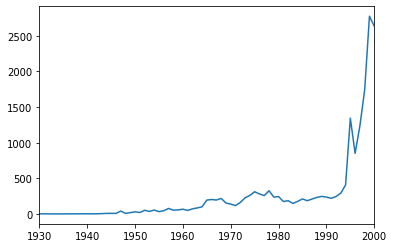

In [31]:
ufo.Year.value_counts().sort_index().plot() 

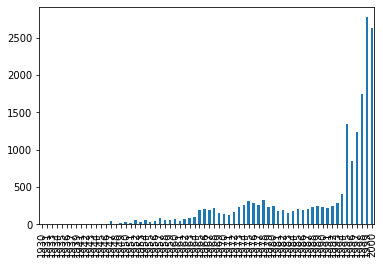

In [32]:
ufo.Year.value_counts().sort_index().plot(kind = 'bar') 